# Spam Message Classification: A Machine Learning Approach

## 1. Setup

### 1.1 Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Machine Learning: Preprocessing and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Machine Learning: Models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Utilities
import string
import pickle

# Visualization for Text Data
from wordcloud import WordCloud

### 1.2 Download NLTK Resources

In [2]:
# Ensure NLTK resources are downloaded (do this once)
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lungu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lungu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lungu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lungu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Data Preprocessing

In [3]:
### 2.1 Load the Dataset

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
# Display the shape of the dataset to understand its size
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 5572 rows and 5 columns.


### 2.2 Cleaning the Dataset

In [7]:
# Dropping unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
# Renaming columns for clarity
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [9]:
# Removing duplicates
df = df.drop_duplicates(keep='first')

In [10]:
# Checking for missing values
print(df.isnull().sum())

label      0
message    0
dtype: int64


In [11]:
# Display the first few rows of the cleaned dataset to verify the changes
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [12]:
# Confirm the new shape of the dataset
print(f"After cleaning, the dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

After cleaning, the dataset contains 5169 rows and 2 columns.


### 2.3 Encode Labels

In [13]:
# Encoding the 'label' column to numerical values
# Map 'ham' to 0 and 'spam' to 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [14]:
# Display the first few rows to verify the changes
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5169 non-null   int64 
 1   message  5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


,label,message
3295,0,Hi there. We have now moved in2 our pub . Woul...
1337,0,Then she buying today? ÌÏ no need to c meh...
2650,0,Do you like shaking your booty on the dance fl...
2762,0,ARR birthday today:) i wish him to get more os...
2692,1,Urgent Urgent! We have 800 FREE flights to Eur...


In [15]:
# Check the distribution of labels to ensure encoding was successful
print("\nLabel distribution after encoding:")
print(df['label'].value_counts())


Label distribution after encoding:
label
0    4516
1     653
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)

### 3.1 Distribution of Classes

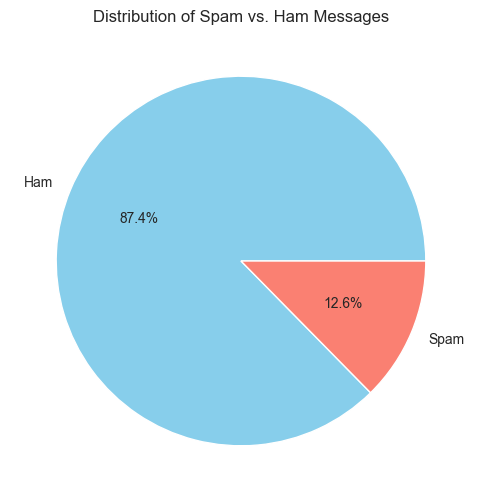

In [16]:
# Start by creating a new figure for plotting with a specified size for better visibility
plt.figure(figsize=(8, 6))

# Use the value_counts() method on the 'label' column to count occurrences of each class
# Plot these counts as a pie chart using the plot method with kind='pie'
# Specify labels for the classes as 'Ham' for legitimate messages and 'Spam' for spam messages
# Use autopct='%1.1f%%' to display the percentage of each class up to 1 decimal place
# Choose colors for each class segment for visual distinction, with 'skyblue' for Ham and 'salmon' for Spam
df['label'].value_counts().plot(kind='pie', labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])

# Set the title of the plot to 'Distribution of Spam vs. Ham Messages' for clarity
plt.title('Distribution of Spam vs. Ham Messages')

# Remove the y-axis label to clean up the plot presentation since it's not necessary for a pie chart
plt.ylabel('')

# Display the plot
plt.show()

### 3.2 Message Characteristics Analysis

In [17]:
# Add a new column 'length' to the DataFrame. This column stores the length of each message
# The length is calculated by simply using the len() function on the 'message' column
df['length'] = df['message'].apply(len)

# Add a new column 'word_count' to the DataFrame. This column stores the count of words in each message
# The word count is calculated by splitting each message by spaces (default behavior of the split() method)
# and then counting the number of elements (words) in the resulting list
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Add a new column 'sentence_count' to the DataFrame. This column stores the count of sentences in each message
# The sentence count is calculated by splitting each message by periods (.)
# This is a simplistic approach and might not be perfectly accurate for all kinds of text
# as it assumes each sentence ends with a period and does not account for other punctuation marks or nuances
df['sentence_count'] = df['message'].apply(lambda x: len(x.split('.')))

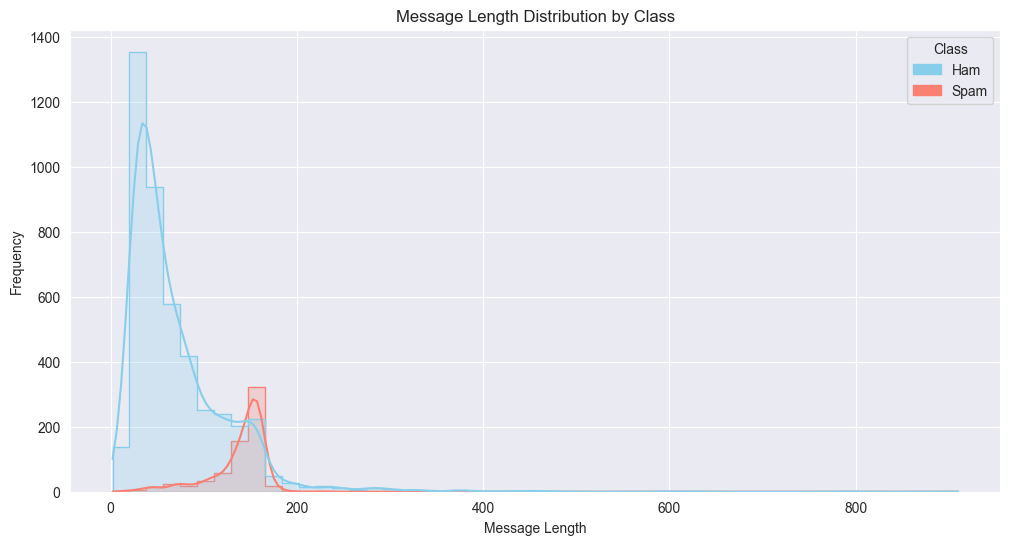

In [18]:
# Create a new figure for the plot with specified dimensions for better visibility
plt.figure(figsize=(12, 6))

# Create a histogram plot using seaborn's histplot function
# 'data=df' specifies the DataFrame to use
# 'x='length'' sets the column for the x-axis (message length in this case)
# 'hue='label'' differentiates the data points by the 'label' column to distinguish between classes
# 'element='step'' changes the histogram's appearance to use step lines instead of solid blocks
# 'palette=['skyblue', 'salmon']' assigns specific colors to the different classes for visual distinction
# 'bins=50' sets the number of bins for the histogram, controlling the level of detail
# 'kde=True' adds a Kernel Density Estimate plot over the histogram to show the data's distribution curve
sns.histplot(data=df, x='length', hue='label', element='step', palette=['skyblue', 'salmon'], bins=50, kde=True)

# Set the title of the plot to indicate what it represents
plt.title('Message Length Distribution by Class')

# Label the x-axis as 'Message Length' to indicate what the values represent
plt.xlabel('Message Length')

# Label the y-axis as 'Frequency' to indicate the count of messages in each bin
plt.ylabel('Frequency')

# Manually create legend entries to improve the legend's clarity and appearance
# 'mpatches.Patch' creates a patch (a piece of the legend key) with a specific color and label
ham_patch = mpatches.Patch(color='skyblue', label='Ham')
spam_patch = mpatches.Patch(color='salmon', label='Spam')

# Add the manually created legend to the plot with 'plt.legend'
# 'handles=[ham_patch, spam_patch]' specifies the list of legend entries to include
# 'title='Class'' sets the title of the legend to 'Class' for context
plt.legend(handles=[ham_patch, spam_patch], title='Class')

# Display the plot
plt.show()

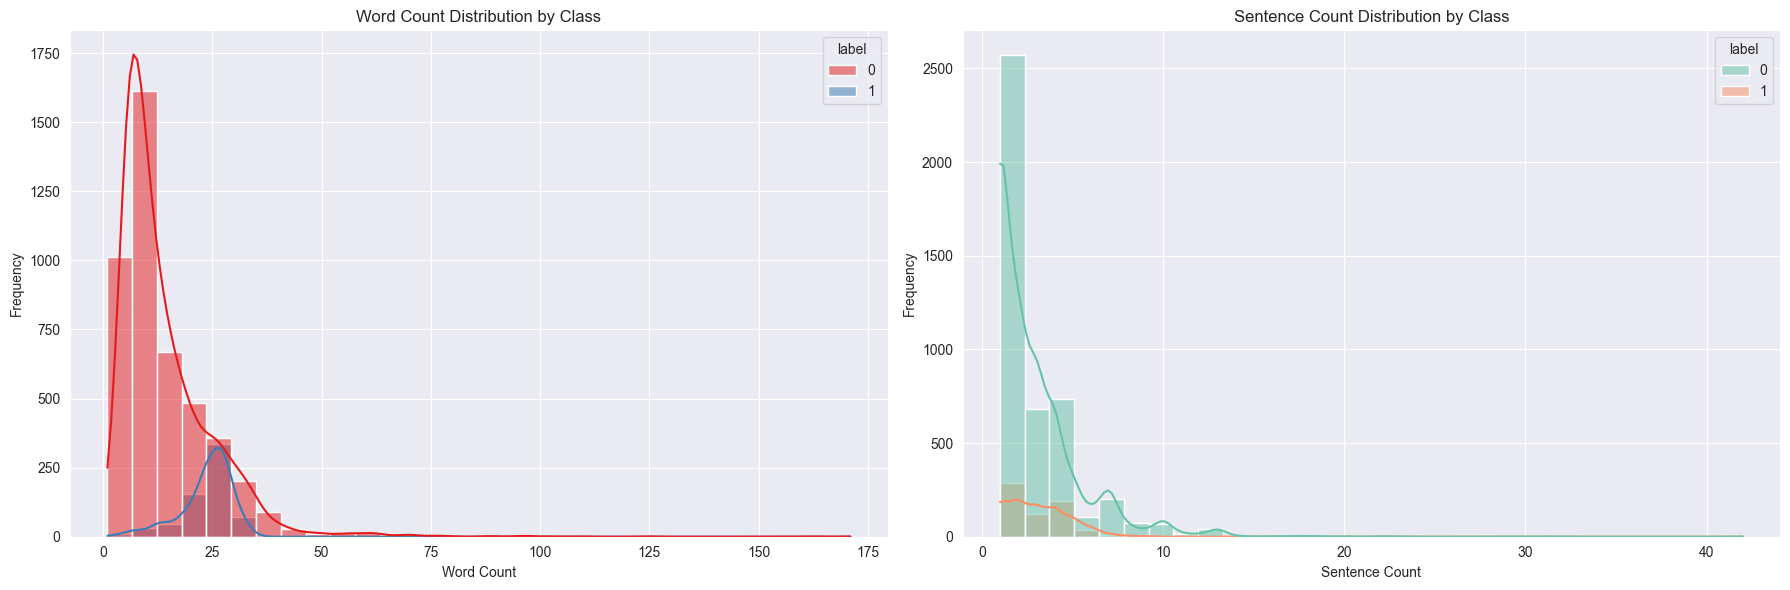

In [19]:
# Create a figure and a 1x2 grid of subplots with specified dimensions for better visibility
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# For the first subplot (word count distribution):
# Use seaborn's histplot to create a histogram of the 'word_count' column, differentiated by 'label'
# 'data=df' specifies the DataFrame to use
# 'x='word_count'' sets the column for the x-axis
# 'hue='label'' differentiates the data points by the 'label' column to distinguish between classes
# 'ax=axes[0]' assigns this plot to the first subplot in the grid
# 'palette='Set1'' specifies the color palette to use for the different classes
# 'bins=30' sets the number of bins for the histogram
# 'kde=True' adds a Kernel Density Estimate plot over the histogram to show the data's distribution curve
sns.histplot(data=df, x='word_count', hue='label', ax=axes[0], palette='Set1', bins=30, kde=True)

# Set the title, x-axis label, and y-axis label for the first subplot
axes[0].set_title('Word Count Distribution by Class')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# For the second subplot (sentence count distribution):
# The process is similar to the first subplot but focuses on the 'sentence_count' column
sns.histplot(data=df, x='sentence_count', hue='label', ax=axes[1], palette='Set2', bins=30, kde=True)

# Set the title, x-axis label, and y-axis label for the second subplot
axes[1].set_title('Sentence Count Distribution by Class')
axes[1].set_xlabel('Sentence Count')
axes[1].set_ylabel('Frequency')

# Adjust the layout of the subplots to ensure there's no overlap and everything is displayed nicely
plt.tight_layout()

# Display the plots
plt.show()

### 3.3 Correlation Analysis

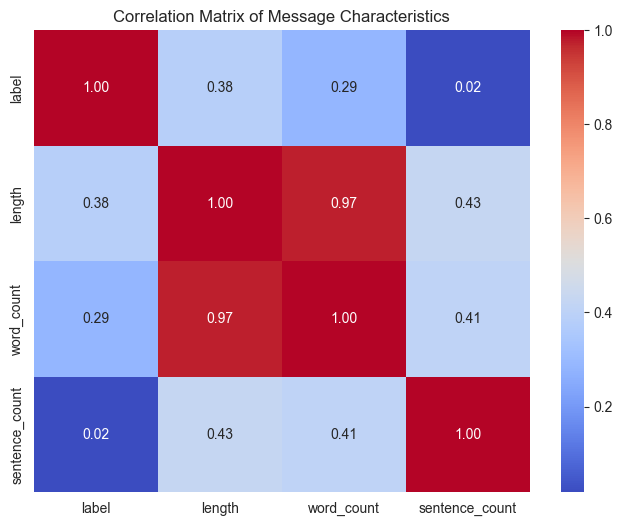

In [20]:
# Calculate the correlation matrix for the specified columns in the DataFrame
# This includes the label (spam or ham) and the newly created features
# The corr() function computes pairwise correlations using Pearson's method by default
correlation_matrix = df[['label', 'length', 'word_count', 'sentence_count']].corr()

# Create a new figure for the plot with specified dimensions for better visibility
plt.figure(figsize=(8, 6))

# Use seaborn's heatmap function to visualize the correlation matrix
# 'annot=True' displays the correlation values in each cell of the heatmap
# 'cmap='coolwarm'' specifies the color map to use, with 'cool' colors indicating negative correlations and 'warm' colors indicating positive correlations
# 'fmt=".2f"' formats the annotation to show only two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title of the heatmap to provide context about its content
plt.title('Correlation Matrix of Message Characteristics')

# Display the heatmap
plt.show()

## 4. Text Data Preparation

### 4.1 Text Preprocessing

#### 4.1.1 Define Preprocessing Function

In [21]:
# Display the first few rows of the original messages
print("Original Messages:")
print(df['message'].head())

Original Messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object


In [22]:
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_and_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos_tag)) for token, pos_tag in nltk.pos_tag(tokens) if token not in stop_words]
    
    return ' '.join(lemmatized_tokens)

#### 4.1.2 Apply Preprocessing

In [23]:
# Apply the preprocessing function to the message column
df['cleaned_message'] = df['message'].apply(clean_and_lemmatize)

In [24]:
# Display the first few rows of the cleaned messages for comparison
print("\nCleaned Messages:")
print(df['cleaned_message'].head())


Cleaned Messages:
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah dont think go usf live around though
Name: cleaned_message, dtype: object


### 4.2 Visualizing Text Data

#### 4.2.1 Word Clouds for Spam and Ham Messages

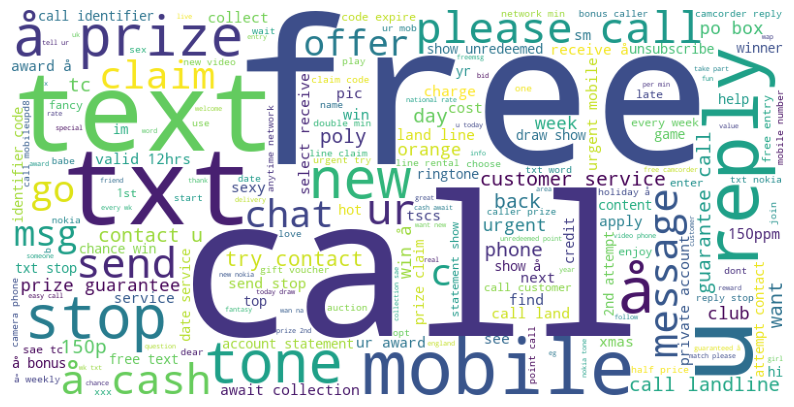

In [25]:
# Visualizing the most common words in spam messages
# Generate a word cloud for spam messages
# 'WordCloud' is initialized with specific dimensions and a background color.
# The 'generate' method creates the word cloud from a single string,
# here obtained by joining all messages marked as spam (where 'label' == 1) in the 'cleaned_message' column.
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['label'] == 1]['cleaned_message']))

# Prepare to display the word cloud
# A new figure is created with specified dimensions for better visibility.
plt.figure(figsize=(10, 7))

# Display the generated word cloud image using 'imshow' from matplotlib.
# 'imshow' is typically used for displaying images. Here, it shows the word cloud as an image.
plt.imshow(spam_wc)

# Disable the axes to focus on the word cloud image itself without any additional chart information.
plt.axis('off')

# Show the plot with the word cloud.
# This command renders the figure and displays it to the user.
plt.show()

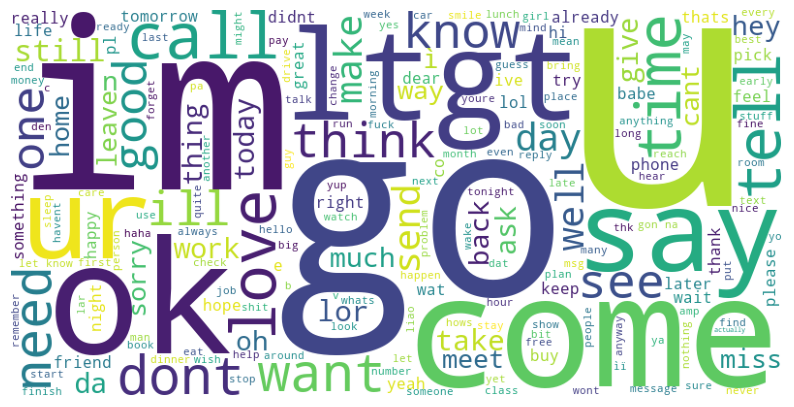

In [26]:
# Visualizing the most common words in ham messages
# Generate a word cloud for ham messages
# Initialize the WordCloud object with specified width, height, and background color.
# Use the 'generate' method to create the word cloud. This method takes a single string as input,
# created by joining all messages labeled as ham (where 'label' == 0) in the 'cleaned_message' column.
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df[df['label'] == 0]['cleaned_message']))

# Create a new figure with specified dimensions to ensure the word cloud is displayed clearly.
plt.figure(figsize=(10, 7))

# Display the word cloud image using 'imshow', a function that shows the image (the word cloud in this case).
plt.imshow(ham_wc)

# Disable the axes to present the word cloud without any axis markings or labels,
# focusing solely on the visual representation of word frequencies.
plt.axis('off')

# Render and display the figure containing the word cloud.
# This will show the most common words in ham messages, highlighting key differences from spam messages.
plt.show() 

### 4.3 Vectorization (TF-IDF)

#### 4.3.1 Initialize and Configure TF-IDF Vectorizer

In [27]:
# Import the TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
# You can adjust the parameters based on your specific needs or based on insights from previous steps
tfidf_vect = TfidfVectorizer(max_features=3000,  # Limit the number of features to the top 3000 terms
                             ngram_range=(1, 2),  # Consider both unigrams and bigrams
                             use_idf=True)        # Enable inverse document frequency reweighting

# Fit the vectorizer to the cleaned messages and transform the data
X_tfidf = tfidf_vect.fit_transform(df['cleaned_message'])

# The result is a sparse matrix where each row corresponds to a message,
# and each column represents a term from the vocabulary. The values are the TF-IDF scores.

#### 4.3.2 Preparing Data for Model Training

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# 'X_train' and 'X_test' are the portions of your TF-IDF matrix for training and testing
# 'y_train' and 'y_test' are the corresponding labels for the training and testing sets
# Print the sizes of the training and testing sets to verify the split.
# '.shape[0]' retrieves the number of rows in each set, corresponding to the number of samples.
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 4135 samples
Testing set size: 1034 samples


## 5. Model Training and Evaluation

### 5.1 Train Multiple Models

#### 5.1.1 Define Models

In [29]:
# Define a dictionary to hold models
models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(solver='liblinear', penalty='l1'),
    'SVC': SVC(kernel='sigmoid', gamma=1.0, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=50, random_state=2),
    'BaggingClassifier': BaggingClassifier(n_estimators=50, random_state=2),
    'ExtraTreesClassifier': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=50, random_state=2),
    'XGBClassifier': XGBClassifier(n_estimators=50, random_state=2, use_label_encoder=False, eval_metric='logloss')
}

In [30]:
# Initialize a dictionary to hold evaluation metrics
model_metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC AUC": []
}

In [31]:
def train_evaluate(classifier, classifier_name, x_train, x_test, y_train_data, y_test_data):
    """
    Trains a classifier on training data, evaluates its performance on test data,
    and records the performance metrics.

    Parameters:
    - classifier: The machine learning classifier to be trained and evaluated.
    - classifier_name: A string representing the name of the classifier, for identification.
    - x_train: The training data features.
    - x_test: The test data features.
    - y_train_data: The training data labels.
    - y_test_data: The test data labels.
    """
    
    # Fit the classifier on the training data.
    classifier.fit(x_train, y_train_data)
    
    # Predict the labels for the test set.
    y_pred = classifier.predict(x_test)
    
    # If the classifier has a method to predict probabilities, use it to get the probabilities
    # for the positive class; otherwise, create a dummy list of zeros.
    y_pred_proba = classifier.predict_proba(x_test)[:, 1] if hasattr(classifier, "predict_proba") else [0] * len(y_pred)
    
    # Calculate various performance metrics to evaluate the classifier.
    accuracy = accuracy_score(y_test_data, y_pred)  # The proportion of correct predictions.
    precision = precision_score(y_test_data, y_pred)  # The ratio of true positives to all positive predictions.
    recall = recall_score(y_test_data, y_pred)  # The ratio of true positives to all actual positives.
    f1 = f1_score(y_test_data, y_pred)  # The harmonic mean of precision and recall.
    # Calculate the area under the ROC curve, if probability predictions are available.
    roc_auc = roc_auc_score(y_test_data, y_pred_proba) if hasattr(classifier, "predict_proba") else None
    
    # Append the calculated metrics to a predefined dictionary for later analysis.
    # This assumes that 'model_metrics' is a dictionary defined outside this function
    # with keys corresponding to the metrics names and 'Model'.
    model_metrics["Model"].append(classifier_name)
    model_metrics["Accuracy"].append(accuracy)
    model_metrics["Precision"].append(precision)
    model_metrics["Recall"].append(recall)
    model_metrics["F1 Score"].append(f1)
    model_metrics["ROC AUC"].append(roc_auc)

#### 5.1.2 Evaluate Models

In [32]:
# Train and evaluate each model
for name, model in models.items():
    # Call the 'train_evaluate' function for each model.
    # 'name' is the name of the model, used for identification in the results.
    # 'model' is the classifier instance to be trained and evaluated.
    # 'X_train' and 'X_test' are the feature sets for training and testing, respectively.
    # 'y_train' and 'y_test' are the label sets for training and testing, respectively.
    train_evaluate(model, name, X_train, X_test, y_train, y_test)

### 5.2 Model Comparison

#### 5.2.1 Compare Performance Metrics

In [33]:
# Convert model metrics into a DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Display the metrics for the model in a simplified format
print(metrics_df.round(3).to_string(index=False))

                     Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
             MultinomialNB     0.972      1.000   0.800     0.889    0.981
               BernoulliNB     0.975      0.992   0.828     0.902    0.990
        LogisticRegression     0.942      0.883   0.676     0.766    0.976
                       SVC     0.976      0.962   0.862     0.909    0.985
    DecisionTreeClassifier     0.919      0.790   0.572     0.664    0.858
      KNeighborsClassifier     0.912      0.982   0.379     0.547    0.813
    RandomForestClassifier     0.972      0.992   0.807     0.890    0.980
         BaggingClassifier     0.957      0.869   0.821     0.844    0.967
      ExtraTreesClassifier     0.975      0.976   0.841     0.904    0.985
GradientBoostingClassifier     0.943      0.930   0.641     0.759    0.961
             XGBClassifier     0.961      0.895   0.821     0.856    0.972


#### 5.2.2 Visualization of Model Comparisons

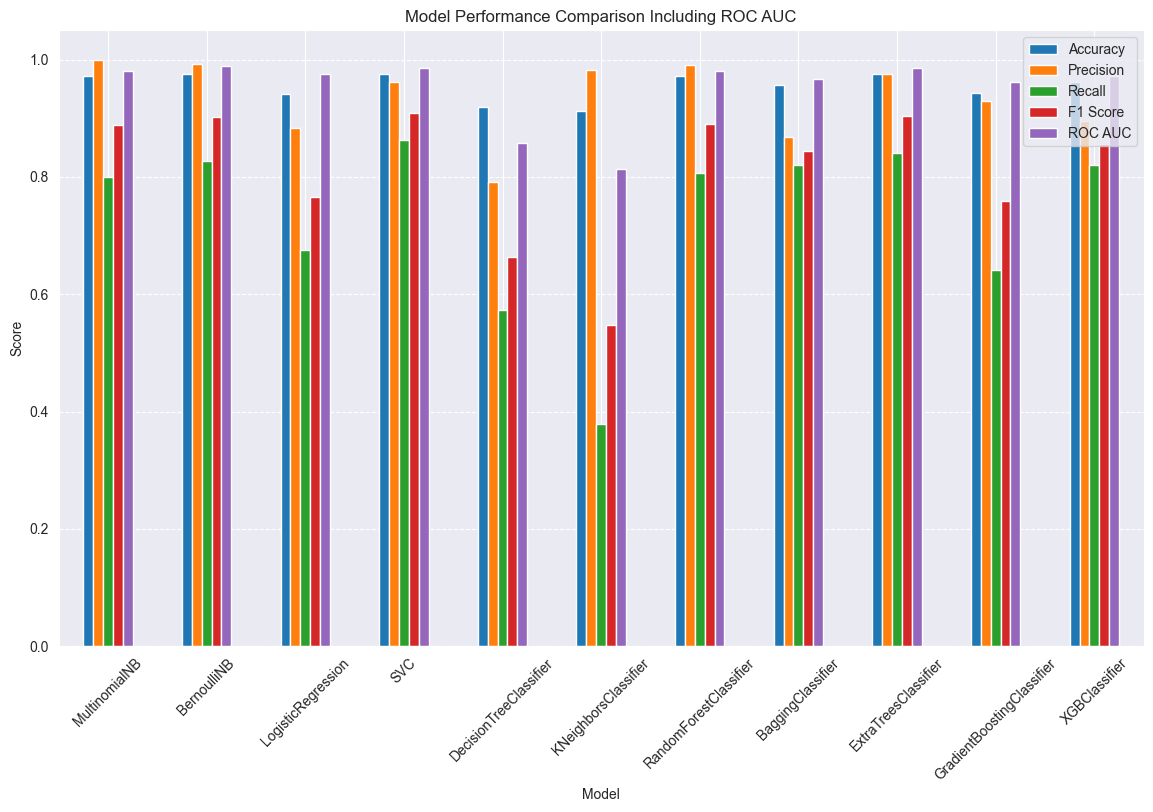

In [34]:
# Set the 'Model' column as the index of the DataFrame. 
# This is done to use the model names as labels on the x-axis in the plot.
# Plotting the model performance metrics including ROC AUC (if it exists in the DataFrame).
# 'kind='bar'' specifies that a bar plot is to be used for visualization.
# 'figsize=(14, 8)' sets the size of the plot for better visibility and readability of the data.
# Set the 'Model' column as the index of the DataFrame
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(14, 8))

# Set the title of the plot to provide context about the visualized information.
# 'Model Performance Comparison Including ROC AUC' clearly indicates that the plot includes
# a comparison of different models and specifies that ROC AUC scores are included if available.
plt.title('Model Performance Comparison Including ROC AUC')

# Label the y-axis as 'Score' to indicate that the bars represent various performance scores
# of the models according to different evaluation metrics.
plt.ylabel('Score')

# Rotate the x-axis labels (model names) by 45 degrees to ensure they are readable,
# which is particularly useful when the plot includes many models.
plt.xticks(rotation=45)

# Enhance the plot readability by adding a grid to the y-axis with dashed lines.
# This helps in visually estimating the scores for each model and metric.
plt.grid(axis='y', linestyle='--')

# Place the legend in the 'upper right' part of the plot to identify the metrics represented by each bar color.
# This is important for understanding what each bar in the plot represents in terms of evaluation metrics.
plt.legend(loc='upper right')

# Display the plot to show a comprehensive comparison of model performances.
# This visualization helps in quickly identifying the best-performing models across
# all considered metrics, including the ROC AUC score.
plt.show()

## 6. Tuning the Models

### 6.1 Tuning BernoulliNB

#### 6.1.1 Define Parameter Grid and Perform Grid Search

In [35]:
# Parameter grid for BernoulliNB
param_grid_bnb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
}

# Initialize the GridSearchCV object for BernoulliNB
grid_search_bnb = GridSearchCV(BernoulliNB(), param_grid_bnb, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_bnb.fit(X_train, y_train)

# Best parameters and score for BernoulliNB
print("Best Parameters for BernoulliNB:", grid_search_bnb.best_params_)
print("Best Score for BernoulliNB:", grid_search_bnb.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for BernoulliNB: {'alpha': 0.1}
Best Score for BernoulliNB: 0.9828295042321644


#### 6.1.3 Evaluate and Select Best Parameters

In [36]:
# Instantiate BernoulliNB with the best alpha parameter
bnb_optimized = BernoulliNB(alpha=0.1)

# Fit the model on the training data
bnb_optimized.fit(X_train, y_train)

# Predictions on the test set using class labels
y_pred = bnb_optimized.predict(X_test)

# Predictions on the test set using probabilities for ROC AUC score calculation
y_pred_proba = bnb_optimized.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9778
Precision: 0.9841
Recall: 0.8552
F1 Score: 0.9151
ROC AUC: 0.9889


### 6.2 Tuning SVC

#### 6.2.1 Define Parameter Grid and Perform Grid Search

In [37]:
# Parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize the GridSearchCV object for SVC
grid_search_svc = GridSearchCV(SVC(probability=True, random_state=2), param_grid_svc, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_svc.fit(X_train, y_train)

# Best parameters and score for SVC
print("Best Parameters for SVC:", grid_search_svc.best_params_)
print("Best Score for SVC:", grid_search_svc.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVC: 0.9779927448609431


#### 6.1.3 Evaluate and Select Best Parameters

In [38]:
# Instantiate SVC with the best parameters
svc_optimized = SVC(C=1, gamma='scale', kernel='linear', probability=True, random_state=2)

# Fit the model on the training data
svc_optimized.fit(X_train, y_train)

# Predictions on the test set using class labels
y_pred = svc_optimized.predict(X_test)

# Predictions on the test set using probabilities for ROC AUC score calculation
y_pred_proba = svc_optimized.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9768
Precision: 0.9690
Recall: 0.8621
F1 Score: 0.9124
ROC AUC: 0.9847


## 7. Implement a Voting Classifier

### 7.1 Create and Fit the Voting Classifier

In [39]:
# Create the VotingClassifier with the optimized models
voting_clf = VotingClassifier(
    estimators=[
        ('bnb', BernoulliNB()),
        ('svc', SVC(kernel='sigmoid', gamma=1.0, probability=True)),
        ('mnb', MultinomialNB())
    ],
    voting='soft'
)
# Fit the VotingClassifier to your training data
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('bnb', BernoulliNB()),
                             ('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB())],
                 voting='soft')

### 7.2 Make Predictions and Evaluate Metrics VC

In [40]:
# Making predictions with the VotingClassifier
y_pred_voting = voting_clf.predict(X_test)

# Calculating evaluation metrics
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, zero_division=0)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)

# For ROC-AUC, we need prediction probabilities for the positive class
y_pred_probs_voting = voting_clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
roc_auc_voting = roc_auc_score(y_test, y_pred_probs_voting)

# Printing the evaluation metrics
print(f"Voting Classifier - Accuracy: {accuracy_voting:.4f}")
print(f"Voting Classifier - Precision: {precision_voting:.4f}")
print(f"Voting Classifier - Recall: {recall_voting:.4f}")
print(f"Voting Classifier - F1 Score: {f1_voting:.4f}")
print(f"Voting Classifier - ROC-AUC: {roc_auc_voting:.4f}")

Voting Classifier - Accuracy: 0.9768
Voting Classifier - Precision: 1.0000
Voting Classifier - Recall: 0.8345
Voting Classifier - F1 Score: 0.9098
Voting Classifier - ROC-AUC: 0.9854


## 8. Implement a Stacking Classifier

### 8.1 Create and Fit the Stacking Classifier

In [41]:
# Define the final estimator
final_estimator = LogisticRegression()

# List of (name, estimator) tuples for base learners
base_learners = [
    ('bnb', BernoulliNB()),
        ('svc', SVC(kernel='sigmoid', gamma=1.0, probability=True)),
        ('mnb', MultinomialNB())
]

# Instantiate the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=final_estimator,
    cv=5  # Number of folds for cross-validation used to train final estimator
)

# Fitting the StackingClassifier to the training data
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('bnb', BernoulliNB()),
                               ('svc',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('mnb', MultinomialNB())],
                   final_estimator=LogisticRegression())

In [42]:
### 8.2 Make Predictions and Evaluate Metrics SC

In [43]:
# Making predictions with the StackingClassifier
y_pred_stacking = stacking_clf.predict(X_test)

# Calculating evaluation metrics
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, zero_division=0)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)

# For ROC-AUC, we need prediction probabilities for the positive class
y_pred_probs_stacking = stacking_clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
roc_auc_stacking = roc_auc_score(y_test, y_pred_probs_stacking)

# Printing the evaluation metrics
print(f"Stacking Classifier - Accuracy: {accuracy_stacking:.4f}")
print(f"Stacking Classifier - Precision: {precision_stacking:.4f}")
print(f"Stacking Classifier - Recall: {recall_stacking:.4f}")
print(f"Stacking Classifier - F1 Score: {f1_stacking:.4f}")
print(f"Stacking Classifier - ROC-AUC: {roc_auc_stacking:.4f}")

Stacking Classifier - Accuracy: 0.9778
Stacking Classifier - Precision: 0.9621
Stacking Classifier - Recall: 0.8759
Stacking Classifier - F1 Score: 0.9170
Stacking Classifier - ROC-AUC: 0.9856


## 9. Visualise the metrics in a DataFrame

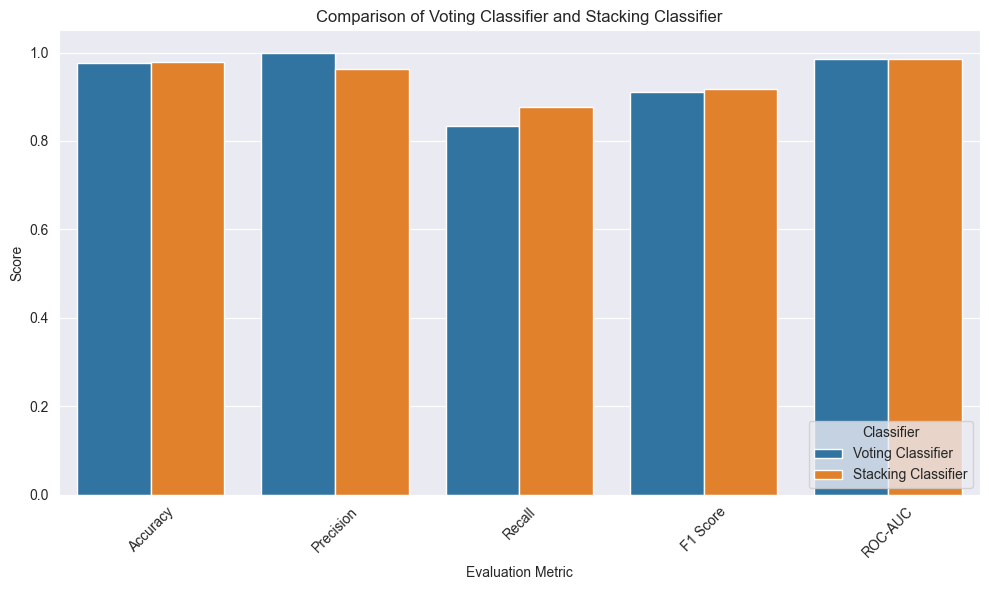

In [44]:
# Create a DataFrame to hold the metrics for each classifier
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
    'Voting Classifier': [accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting],
    'Stacking Classifier': [accuracy_stacking, precision_stacking, recall_stacking, f1_stacking, roc_auc_stacking]
}

df_metrics = pd.DataFrame(data)

# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = df_metrics.melt(id_vars='Metric', var_name='Classifier', value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Classifier', data=df_melted)
plt.title('Comparison of Voting Classifier and Stacking Classifier')
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.xticks(rotation=45)
plt.legend(title='Classifier', loc='lower right')
plt.tight_layout()
plt.show()

## 10. Final Model Selection and Training

### 10.1 Select and Train the Final Model

In [45]:
# Final Training of the Voting Classifier
voting_clf_final = VotingClassifier(estimators=[
    ('bnb', bnb_optimized),
    ('svc', svc_optimized),
    ('mnb', MultinomialNB())
], voting='soft')

In [46]:
# Fit the model on the entire dataset
X_final = tfidf_vect.transform(df['cleaned_message']).toarray()  # Vectorizing the entire dataset
y_final = df['label'].values  # Target variable

voting_clf_final.fit(X_final, y_final)

VotingClassifier(estimators=[('bnb', BernoulliNB(alpha=0.1)),
                             ('svc',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=2)),
                             ('mnb', MultinomialNB())],
                 voting='soft')

### 10.2 Save Model and Vectorizer

In [47]:
# Save the final model and vectorizer
pickle.dump(tfidf_vect, open('vectorizer.pkl', 'wb'))
pickle.dump(voting_clf_final, open('model.pkl', 'wb'))

## 11. Making Predictions

### 11.1 Define a Prediction Function

In [48]:
# Prediction function
def predict_spam(input_message):
    # Load the saved model and vectorizer
    loaded_vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
    loaded_model = pickle.load(open('model.pkl', 'rb'))
    
    # Preprocess the message
    transformed_message = clean_and_lemmatize(input_message)  # Use the revised transform_text function
    vectorized_message = loaded_vectorizer.transform([transformed_message]).toarray()
    
    # Predict and return result
    prediction = loaded_model.predict(vectorized_message)
    return 'Spam' if prediction[0] == 1 else 'Ham'

### 11.2 Example Prediction

In [49]:
# Example usage
message = "Congratulations! You've won a $1000 Walmart gift card. Go to https://bit.ly/123XYZ to claim now."
print(predict_spam(message))

Spam
